# Hacktiv8 Phase 0: Non Graded Challenge 11

---

By [Rifky Aliffa](https://github.com/Penzragon)

Dataset yang digunakan adalah dataset Covid-19 Indonesia, yang dapat dilihat di [Kaggle](https://www.kaggle.com/hendratno/covid19-indonesia).

Instructions:

- Cari Measure of Central Tendency dari data tersebut.
- Cari Measure of Variance dari data tersebut.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Data Loading

In [2]:
covid = pd.read_csv('covid_19_indonesia_time_series_all.csv')

In [3]:
covid.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


### Data Characteristics

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [5]:
covid.describe().T

,count,mean,std,min,25%,50%,75%,max
New Cases,21759.0,3.912936e+02,2.074551e+03,0.000000,7.000000e+00,4.100000e+01,1.510000e+02,5.675700e+04
New Deaths,21759.0,1.322041e+01,7.648262e+01,0.000000,0.000000e+00,1.000000e+00,5.000000e+00,2.069000e+03
New Recovered,21759.0,3.773110e+02,1.999063e+03,0.000000,4.000000e+00,3.100000e+01,1.430000e+02,4.883200e+04
New Active Cases,21759.0,7.621674e-01,9.372135e+02,-25725.000000,-1.600000e+01,0.000000e+00,2.700000e+01,3.672600e+04
Total Cases,21759.0,8.525997e+04,3.685133e+05,1.000000,1.822500e+03,1.078000e+04,3.646450e+04,4.257243e+06
Total Deaths,21759.0,2.648289e+03,1.177601e+04,0.000000,5.000000e+01,2.830000e+02,1.050000e+03,1.438580e+05
Total Recovered,21759.0,7.671260e+04,3.403957e+05,0.000000,1.038500e+03,8.745000e+03,3.293250e+04,4.105680e+06
Total Active Cases,21759.0,5.899079e+03,2.751810e+04,-2306.000000,1.820000e+02,9.190000e+02,2.607500e+03,5.741350e+05
City or Regency,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,21759.0,2.416026e+01,6.870827e+01,1.000000,7.000000e+00,1.100000e+01,1.800000e+01,4.160000e+02


In [6]:
covid.isna().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                21759
Province                         642
Country                            0
Continent                          0
Island                           642
Time Zone                        642
Special Status                 18636
Total Regencies                    0
Total Cities                     614
Total Districts                    0
Total Urban Villages             617
Total Rural Villages             642
Area (km2)                         0
Population                         0
Population Density                 0
L

## Data Exploration

## Outlier

Text(0.5, 1.0, 'New Cases Box Plot')

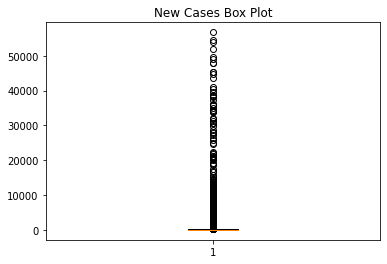

In [7]:
plt.boxplot(covid['New Cases'])
plt.title('New Cases Box Plot')

Dapat dilihat pada boxplot, banyak data point yang merupakan outlier.

### Outlier Removal Using IQR

In [8]:
Q1 = np.quantile(covid['New Cases'], 0.25) # First Quartile
Q3 = np.quantile(covid['New Cases'], 0.75) # Third Quartile

In [9]:
IQR = Q3 - Q1 # Inter Quartile Range

In [10]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

In [11]:
covid_no_outlier = covid[(covid['New Cases'] > lower_limit) & (covid['New Cases'] < upper_limit)]

In [12]:
covid_no_outlier

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


Text(0.5, 1.0, 'New Cases After Outlier Removal')

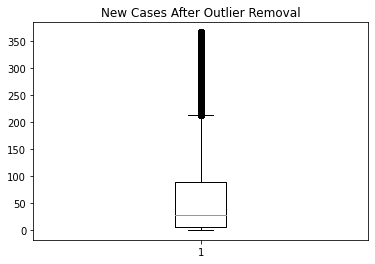

In [13]:
plt.boxplot(covid_no_outlier['New Cases'])
plt.title('New Cases After Outlier Removal')

### Central Tendency

In [14]:
new_cases_mean = np.mean(covid_no_outlier['New Cases'])
new_cases_median = np.median(covid_no_outlier['New Cases'])
new_cases_mode = stats.mode(covid_no_outlier['New Cases'])

In [15]:
print(f'Mean: {new_cases_mean}')
print(f'Median: {new_cases_median}')
print(f'Mode: {new_cases_mode[0][0]}')

Mean: 62.17193969635842
Median: 28.0
Mode: 0


#### Plot

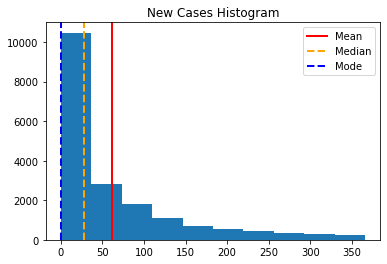

In [16]:
plt.hist(covid_no_outlier['New Cases'])
plt.axvline(new_cases_mean, color='r', linewidth=2, label='Mean')
plt.axvline(new_cases_median, color='orange', linewidth=2, label='Median', linestyle='dashed')
plt.axvline(new_cases_mode[0], color='b', linewidth=2, label='Mode', linestyle='dashed')
plt.title('New Cases Histogram')
plt.legend()

### Variance and Standard Deviation

#### Variance

In [17]:
new_cases_variance = np.var(covid_no_outlier['New Cases'])

In [18]:
print(f'Variance: {new_cases_variance}')

Variance: 6500.944053897627


#### Standard Deviation

In [19]:
new_cases_std = np.std(covid_no_outlier['New Cases'])

In [20]:
print(f'Standard Deviation: {new_cases_std}')

Standard Deviation: 80.62843204414698


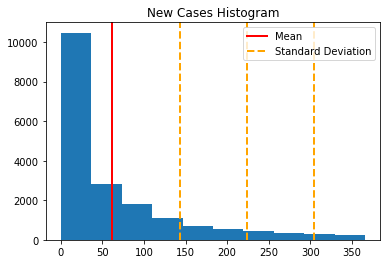

In [21]:
plt.hist(covid_no_outlier['New Cases'])
plt.axvline(new_cases_mean, color='r', linewidth=2, label='Mean')
plt.axvline(new_cases_mean + new_cases_std, linewidth=2, linestyle='dashed', label='Standard Deviation', color='orange')
plt.axvline(new_cases_mean + new_cases_std * 2, linewidth=2, linestyle='dashed', color='orange')
plt.axvline(new_cases_mean + new_cases_std * 3, linewidth=2, linestyle='dashed', color='orange')
plt.title('New Cases Histogram')
plt.legend()